In [97]:
import pickle
import numpy as np
#
# Load np arrays (stored in a pickle file) from disk
#
pipeline_id = "A652_E-N_EI"
file = open("../data/datasets/" + pipeline_id + ".pickle", 'rb')
(X_train, y_train,  
 X_val, y_val,  
 X_test, y_test) = pickle.load(file)

In [98]:
def check_nans(X):
    n = 0
    for i in range(len(X)):
        if np.isnan(X[i]).any():
#             print(i)
            n += 1
    print("===")
    print(f"{n}/{len(X)}")

check_nans(X_train)
check_nans(X_val)
check_nans(X_test)

===
0/13468
===
0/3402
===
0/1841


In [27]:
X_train.shape, y_train.shape

((13438, 6, 23), (13438, 1))

In [30]:
X_train.reshape(X_train.shape[0], -1).shape

(13438, 138)

In [31]:
X_train2D = X_train.reshape(X_train.shape[0], -1)
X_train2D[0]

array([0.28270042, 0.42532468, 0.88043478, 0.55298955, 0.49021567,
       0.0669873 , 0.75      , 0.        , 0.47084295, 0.77661105,
       0.34322122, 0.65790253, 0.61430599, 0.4604812 , 0.63507115,
       0.47572388, 0.56098719, 0.45890779, 0.49150801, 0.55432072,
       0.40529632, 0.91846377, 0.51415201, 0.28691983, 0.42532468,
       0.85869565, 0.5116869 , 0.49479697, 0.14644661, 0.85355339,
       0.        , 0.45943257, 0.78837189, 0.33323012, 0.57246987,
       0.44336747, 0.4589551 , 0.58158016, 0.51030118, 0.5824785 ,
       0.40450517, 0.49478917, 0.44937618, 0.40798718, 0.92429734,
       0.53827394, 0.32911392, 0.4025974 , 0.7826087 , 0.52077741,
       0.3106947 , 0.25      , 0.9330127 , 0.        , 0.43550781,
       0.77795329, 0.33897863, 0.46064091, 0.31694858, 0.46785991,
       0.63055932, 0.58626187, 0.65398988, 0.43364828, 0.51080056,
       0.59459122, 0.38855501, 0.90917683, 0.53960404, 0.29957806,
       0.36038961, 0.84782609, 0.53799411, 0.38369531, 0.37059

In [32]:
max_value_twod_row = np.amax(X_train2D, axis = 1)
max_value_twod_col = np.amax(X_train2D, axis = 0)

print("Row wise maximum: ", max_value_twod_row)
print("Column wise maximum: ", max_value_twod_col)

Row wise maximum:  [1.         1.         0.98296291 ... 0.85355339 1.         1.        ]
Column wise maximum:  [1.         0.98376623 1.         0.9256309  1.         1.
 1.         0.61842105 0.98662084 0.97717549 0.99605977 1.
 1.         0.95996416 0.99561211 0.96795791 0.94204832 0.99029426
 0.98506261 0.96797863 0.97064114 0.99302525 0.91237017 1.
 1.         1.         0.98535808 1.         1.         1.
 0.61842105 0.99798394 0.98430862 0.99164965 0.99504111 1.
 0.98074118 1.         0.96990688 0.98291237 0.98561348 0.99393115
 1.         0.97224847 1.         0.90609005 0.92827004 1.
 1.         0.96734103 1.         1.         1.         0.61513158
 1.         0.99232817 1.         0.95665503 1.         0.99746457
 0.99509656 0.98112446 1.         0.97544255 1.         0.96797863
 0.97064114 1.         0.96310261 0.94514768 0.99675325 1.
 0.97720432 1.         1.         1.         1.         0.99413499
 0.99232817 1.         0.93340244 1.         1.         0.99561211
 0.98

In [33]:
min(y_train), max(y_train)

(array([0.]), array([60.8]))

In [34]:
import sys 
import os
sys.path.append(os.path.abspath("../src"))
import utils

from utils.model import NetOrdinalClassification
import torch

NUM_FEATURES = X_train.shape[2]
print(NUM_FEATURES)

NUM_CLASSES = 5

# see https://pytorch.org/tutorials/beginner/saving_loading_models.html
model = NetOrdinalClassification(in_channels=NUM_FEATURES, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load('../models/best_' + pipeline_id + '.pt'))
model.eval()

y_pred = model.predict(X_test)

23
Evaluating ordinal classification model...


In [35]:
y_pred.shape

(1832, 1)

In [15]:
X_test.shape

(963, 6, 23)

In [36]:
y_test.shape

(1832, 1)

In [48]:
y_pred

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [51]:
min(y_pred), max(y_pred), min(y_test), max(y_test)

(array([-1]), array([1]), array([0.]), array([64.4]))

In [38]:
y_test.ravel().shape

(1832,)

In [40]:
true_value = pd.Series(y_test.ravel())
pred_value = pd.Series(y_pred.ravel())

df = pd.DataFrame()
df['true_value'] = true_value
df['pred_value'] = pred_value

df.head()

,true_value,pred_value
0,0.2,1
1,1.2,1
2,1.6,1
3,0.6,1
4,0.0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1832 entries, 0 to 1831
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   true_value  1832 non-null   float64
 1   pred_value  1832 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 28.8 KB


In [42]:
df.describe()

,true_value,pred_value
count,1832.000000,1832.000000
mean,0.899236,-0.757096
std,3.139926,0.598062
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,-1.000000
75%,0.600000,-1.000000
max,64.400000,1.000000


<AxesSubplot: >

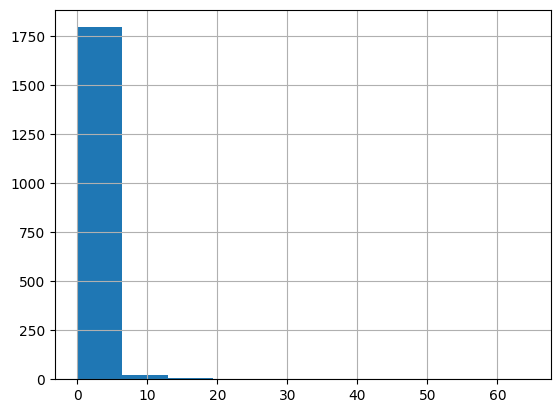

In [46]:
df.true_value.hist()

<AxesSubplot: >

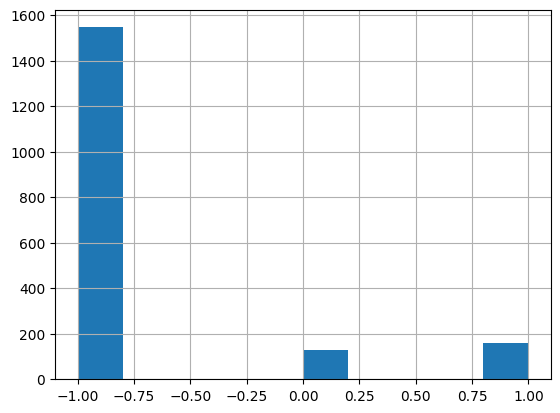

In [44]:
df.pred_value.hist()

In [45]:
df.pred_value.unique()

array([ 1,  0, -1])

In [75]:
np.isnan(X_test).any(), np.isnan(y_test).any()

(True, False)

In [79]:
X_test.shape

(1832, 6, 23)

In [80]:
len(X_test)

1832

In [77]:
X_test[0].shape

(6, 23)

In [73]:
def predict(model, X):
    print('Evaluating ordinal classification model...')
    model.eval()
    
    print("X")
    print("Test X for NaN...", np.isnan(X).any())
    print(f"X.shape: {X.shape}")
    print(X[1:1])
    
    test_x_tensor = torch.from_numpy(X.astype('float64'))
    test_x_tensor = torch.permute(test_x_tensor, (0, 2, 1))

    outputs = []
    with torch.no_grad():
        output = model(test_x_tensor.float())
        print("output:")
        print(output.shape)
        print(output)
#         print(min(output), max(output))

        yb_pred_encoded = output.detach().cpu().numpy()
        print("yb_pred_encoded:")
        print(yb_pred_encoded)
        
        yb_pred_decoded = ordinalencoding2labels(yb_pred_encoded)
        print("yb_pred_decoded:")
        print(yb_pred_decoded)

        outputs.append(yb_pred_decoded.reshape(-1,1))
    
    y_pred = np.vstack(outputs)

    return y_pred

def ordinalencoding2labels(pred: np.ndarray):
    """Convert ordinal predictions to class labels, e.g.
    
    [0.9, 0.1, 0.1, 0.1] -> 0
    [0.9, 0.9, 0.1, 0.1] -> 1
    [0.9, 0.9, 0.9, 0.1] -> 2
    etc.
    """
    return (pred > 0.5).cumprod(axis=1).sum(axis=1) - 1

predict(model, X_test)

Evaluating ordinal classification model...
X
Test X for NaN... True
X.shape: (1832, 6, 23)
[]
output:
torch.Size([1832, 5])
tensor([[9.9970e-01, 7.6649e-01, 7.7353e-03, 8.4794e-05, 1.7071e-04],
        [9.9933e-01, 6.8843e-01, 1.0897e-02, 1.7648e-04, 3.7717e-04],
        [9.9921e-01, 6.7322e-01, 1.1813e-02, 2.1096e-04, 4.4979e-04],
        ...,
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan],
        [       nan,        nan,        nan,        nan,        nan]])
yb_pred_encoded:
[[9.9970275e-01 7.6649314e-01 7.7352817e-03 8.4793894e-05 1.7070521e-04]
 [9.9933392e-01 6.8842721e-01 1.0896889e-02 1.7648125e-04 3.7716553e-04]
 [9.9920928e-01 6.7321956e-01 1.1813388e-02 2.1096047e-04 4.4978855e-04]
 ...
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           nan           nan]
 [          nan           nan           nan           n

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [89]:
df_1997_2021 = pd.read_csv('../data/numerical_models/ERA5_A652_1997_2021.csv')
df_2022_2023 = pd.read_csv('../data/numerical_models/ERA5_A652_2022_2023.csv')

In [90]:
df_1997_2021.shape, df_2022_2023.shape

((219144, 17), (10942, 16))

In [93]:
df_1997_2021 = df_1997_2021.drop(columns=['Unnamed: 0'])

In [94]:
df_1997_2021.columns

Index(['time', 'Geopotential_1000', 'Humidity_1000', 'Temperature_1000',
       'WindU_1000', 'WindV_1000', 'Geopotential_700', 'Humidity_700',
       'Temperature_700', 'WindU_700', 'WindV_700', 'Geopotential_200',
       'Humidity_200', 'Temperature_200', 'WindU_200', 'WindV_200'],
      dtype='object')

In [92]:
df_2022_2023.columns

Index(['time', 'Geopotential_1000', 'Humidity_1000', 'Temperature_1000',
       'WindU_1000', 'WindV_1000', 'Geopotential_700', 'Humidity_700',
       'Temperature_700', 'WindU_700', 'WindV_700', 'Geopotential_200',
       'Humidity_200', 'Temperature_200', 'WindU_200', 'WindV_200'],
      dtype='object')

In [95]:
df_1997_2023 = pd.concat([df_1997_2021, df_2022_2023])
df_1997_2023.to_csv('../data/numerical_models/ERA5_A652_1997_2023.csv')